In [107]:
import nltk
import pandas as pd

In [108]:
df=pd.read_csv('Dataset.csv', encoding = "ISO-8859-1")
df.tail()


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...
1985,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...
1986,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
1987,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
1988,2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates 

In [109]:
df.shape

(1989, 27)

In [110]:
headlines = []
for row in range(0,df.shape[0]):
    headlines.append(' '.join(str(s) for s in df.iloc[row, 2:df.shape[1]]))


In [111]:
headlines[95]

'b\'American Express gets $3.39 Billion, Capital One gets $3.6 Billion, DIscover gets $1.2 Billion...Lets have the intrest rate for this money at 22.99% compounded monthly and with a $3 million late fee.\' b"Archbishop Desmond Tutu has accused South Africa of losing the moral high ground by failing to stand up to Zimbabwe\'s president, Robert Mugabe. " b\'Mexican Beauty Queen Arrested In Gun-Filled Truck (PHOTOS)\' b\'Japan Considers Sending Ships to Fight Pirates\' b\'AS  SEEN ON REDDIT: Please help Sergio Lopez Family, fire victim, 3 kids, house burned, lost his wife, and job... \' b\'Drug Trafficking : One of the Most Serious Challenges Faced By the Nations Worldwide\' b\'CO2 Emissions "Not a Factor" When Approving Coal Plants, EPA Administrator Says\' b\'England - 60,000 households to pay tax at 90%\' b\'Marijuana Ring that Smuggled 900 TONS of Weed into Arizona gets busted\' b"Press Association: Police \'secretly taped Damian Green arrest\'" b\'Ahmadinejad to give festive speech\'

In [112]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()

In [113]:
for i in range(len(headlines)):
    text = headlines[i].lower()
    text = re.sub('[^a-z]', ' ', text)
    text = re.sub('b | n | e ', ' ', text)
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    headlines[i] = text

In [115]:
headlines[95]

'american express get billion capit one get billion discov get billion let intrest rate money compound monthli million late fee b archbishop desmond tutu accus south africa lose moral high ground fail stand zimbabw presid robert mugab b mexican beauti queen arrest gun fill truck photo b japan consid send ship fight pirat b seen reddit pleas help sergio lopez famili fire victim kid hous burn lost wife job b drug traffick one seriou challeng face nation worldwid b co emiss factor approv coal plant epa administr say b england household pay tax b marijuana ring smuggl ton weed arizona get bust b press associ polic secretli tape damian green arrest b ahmadinejad give festiv speech b u afghan plan recruit local militia b truck food allow gaza novemb mean averag truck per day enter strip compar averag octob decemb b chines seek pull cat menu b coup declar guinea dictat death b undersea cabl cut disrupt mideast india commun b behold depress deer hunt video sinc bambi b report egypt readi host 

In [116]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(headlines, df.iloc[:,1], test_size = 0.4, shuffle = False)


In [117]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(ngram_range=(1,2))
vectorizer.fit(x_train)

x_train = vectorizer.transform(x_train).toarray()

In [118]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, criterion = 'entropy')
rfc.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
x_test = vectorizer.transform(x_test).toarray()
y_pred = rfc.predict(x_test)

In [120]:
x_train.shape

(1193, 268617)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


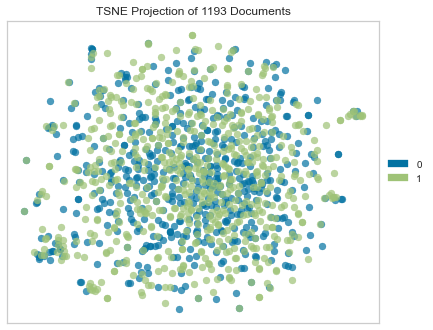

In [121]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer(metric = 'cityblock', size=(600,400))  #metric = euclidean, cityblock, cosine
tsne.fit(x_train, y_train)
tsne.poof()

In [122]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [123]:
print(confusion_matrix(y_test,y_pred))

[[ 21 353]
 [ 25 397]]


In [124]:
accuracy_score(y_test,y_pred)

0.5251256281407035

In [125]:
headline = [' UK Osborne: Absolutely going to have to cut spending, raise taxes']
headline = vectorizer.transform(headline).toarray()
label = rfc.predict(headline)

print(label)

[1]
